In [1]:
import keras

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder,  StandardScaler, OneHotEncoder

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
# Setup plotting
import matplotlib.pyplot as plt
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

import pandas as pd

activation_layer = layers.Activation('relu')
concrete = pd.read_csv('concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
)

X = concrete.copy()
Y = np.log(X.pop('CompressiveStrength'))
X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [4]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=128, activation='relu', input_shape=[8]),
    layers.BatchNormalization(),
    layers.Dense(units=64, activation='relu'),
    layers.BatchNormalization(),
    # the linear output layer 
    layers.Dense(units=1)
])

In [5]:
model.compile(
    optimizer="adam",
    loss="mae"
)

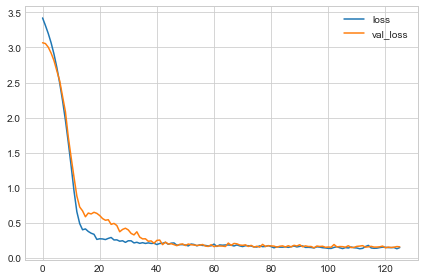

In [6]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0, 
)
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();